### FEATURE SELECTION

#### Feature Importance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import SelectKBest, f_regression, RFE

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

from sklearn.metrics import r2_score, mean_squared_error

In [2]:
dataset1=pd.read_csv("PreProcessedDeveloperProductivityDataset.csv",index_col=None)

In [3]:
df2 = dataset1

In [4]:
df2

,Developer_ID,Week_Number,Experience_Years,Remote_Work,Hours_Worked,Tasks_Completed,Code_Review_Score,Project_Familiarity_Percent,Collaboration_Score,Meetings_Attended,Productivity_Score,Role_Level_Junior,Role_Level_Mid,Role_Level_Senior,Programming_Language_C++,Programming_Language_Go,Programming_Language_Java,Programming_Language_JavaScript,Programming_Language_Python
0,39,15,4.2,0,52.8,7,7.4,52,5.2,1,56.999528,0,0,1,1,0,0,0,0
1,29,32,4.8,0,34.5,15,8.1,61,7.2,9,77.129808,1,0,0,1,0,0,0,0
2,15,32,5.2,1,46.9,19,6.6,58,4.6,4,74.278398,0,1,0,0,0,0,0,1
3,43,24,12.8,1,26.7,10,7.4,73,6.7,3,66.969578,1,0,0,0,0,0,1,0
4,8,41,2.5,0,29.6,15,8.7,53,8.5,7,83.842350,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,37,32,8.8,0,35.2,16,5.4,44,4.7,9,65.830453,1,0,0,0,0,0,1,0
196,33,47,11.2,1,35.8,13,9.8,52,7.7,3,79.383883,0,0,1,0,0,1,0,0
197,42,22,11.6,1,40.0,14,8.3,68,8.6,6,73.092362,0,0,1,1,0,0,0,0
198,44,23,12.4,1,43.5,14,6.9,70,7.9,6,76.407934,0,0,1,0,1,0,0,0


In [5]:
indep_X = df2.drop('Productivity_Score', 1)
dep_Y = df2['Productivity_Score']

In [6]:
def feature_importance_all_models(X, y):
    coef_models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(),
        'Lasso Regression': Lasso(),
        'SVR (Linear Kernel)': SVR(kernel='linear')
    }

    tree_models = {
        'Random Forest': RandomForestRegressor(),
        'Gradient Boosting': GradientBoostingRegressor(),
        'XGBoost': XGBRegressor()
    }

    #scaler = StandardScaler()
    #X_scaled = scaler.fit_transform(X)

    feature_names = X.columns
    importance_dict = {}

    # Coefficient-based models
    for name, model in coef_models.items():
        model.fit(X, y)
        importances = np.abs(model.coef_.ravel())
        importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
        importance_df = importance_df.sort_values(by='Importance', ascending=False)
        importance_dict[name] = importance_df

        print(f"\n📊 Feature Importance for {name}")
        print(importance_df)

        plt.figure(figsize=(8, 4))
        plt.barh(importance_df['Feature'], importance_df['Importance'])
        plt.xlabel("Importance")
        plt.title(f"Feature Importance: {name}")
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()

    # Tree-based models
    for name, model in tree_models.items():
        model.fit(X, y)
        importances = model.feature_importances_
        importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
        importance_df = importance_df.sort_values(by='Importance', ascending=False)
        importance_dict[name] = importance_df

        print(f"\n📊 Feature Importance for {name}")
        print(importance_df)

        plt.figure(figsize=(8, 4))
        plt.barh(importance_df['Feature'], importance_df['Importance'])
        plt.xlabel("Importance")
        plt.title(f"Feature Importance: {name}")
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()

    return importance_dict




📊 Feature Importance for Linear Regression
                            Feature  Importance
6                 Code_Review_Score    2.715397
5                   Tasks_Completed    2.022377
8               Collaboration_Score    1.828074
13         Programming_Language_C++    1.461982
3                       Remote_Work    0.929775
16  Programming_Language_JavaScript    0.735582
9                 Meetings_Attended    0.577882
15        Programming_Language_Java    0.561832
7       Project_Familiarity_Percent    0.242435
10                Role_Level_Junior    0.237375
12                Role_Level_Senior    0.208688
17      Programming_Language_Python    0.128005
14          Programming_Language_Go    0.036563
11                   Role_Level_Mid    0.028687
0                      Developer_ID    0.021963
4                      Hours_Worked    0.021178
1                       Week_Number    0.001375
2                  Experience_Years    0.001187


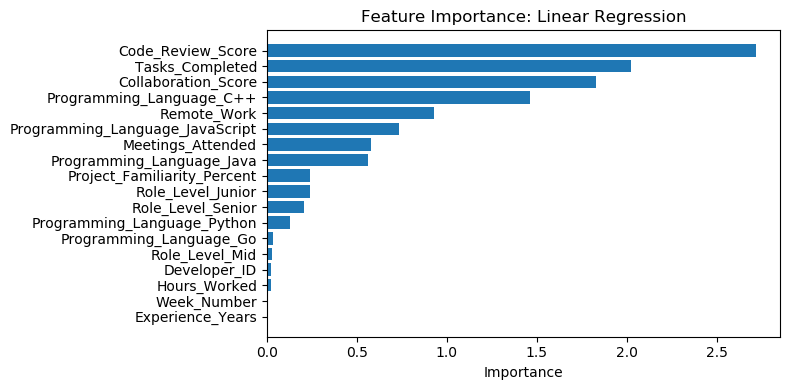


📊 Feature Importance for Ridge Regression
                            Feature  Importance
6                 Code_Review_Score    2.709825
5                   Tasks_Completed    2.022027
8               Collaboration_Score    1.824851
13         Programming_Language_C++    1.423971
3                       Remote_Work    0.915618
16  Programming_Language_JavaScript    0.719111
9                 Meetings_Attended    0.577494
15        Programming_Language_Java    0.546275
7       Project_Familiarity_Percent    0.242397
10                Role_Level_Junior    0.232635
12                Role_Level_Senior    0.201926
17      Programming_Language_Python    0.125553
14          Programming_Language_Go    0.033032
11                   Role_Level_Mid    0.030709
0                      Developer_ID    0.021984
4                      Hours_Worked    0.020962
2                  Experience_Years    0.001327
1                       Week_Number    0.001307


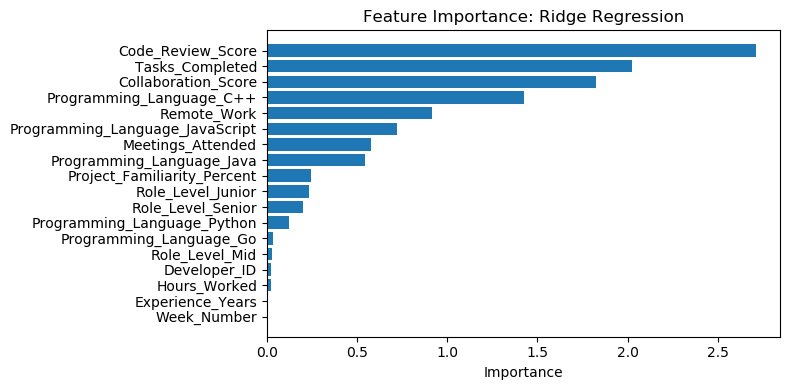


📊 Feature Importance for Lasso Regression
                            Feature  Importance
6                 Code_Review_Score    2.252322
5                   Tasks_Completed    1.981647
8               Collaboration_Score    1.524802
9                 Meetings_Attended    0.461141
7       Project_Familiarity_Percent    0.237447
0                      Developer_ID    0.019468
4                      Hours_Worked    0.000136
3                       Remote_Work    0.000000
2                  Experience_Years    0.000000
1                       Week_Number    0.000000
10                Role_Level_Junior    0.000000
11                   Role_Level_Mid    0.000000
12                Role_Level_Senior    0.000000
13         Programming_Language_C++    0.000000
14          Programming_Language_Go    0.000000
15        Programming_Language_Java    0.000000
16  Programming_Language_JavaScript    0.000000
17      Programming_Language_Python    0.000000


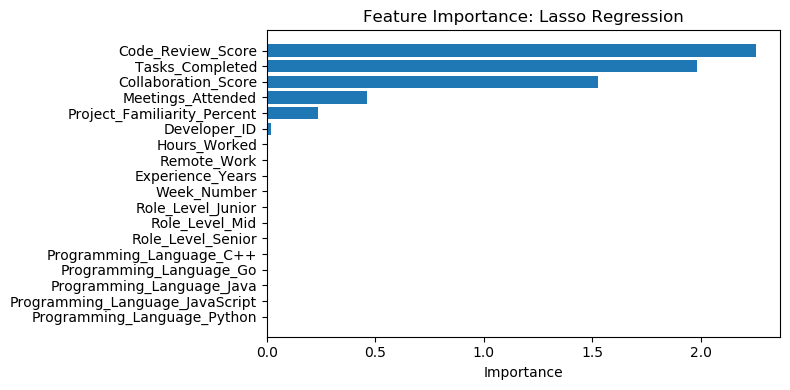


📊 Feature Importance for SVR (Linear Kernel)
                            Feature  Importance
6                 Code_Review_Score    2.633573
13         Programming_Language_C++    2.083820
5                   Tasks_Completed    2.061759
8               Collaboration_Score    1.953732
3                       Remote_Work    1.489449
16  Programming_Language_JavaScript    0.782692
17      Programming_Language_Python    0.638750
9                 Meetings_Attended    0.554137
11                   Role_Level_Mid    0.420573
15        Programming_Language_Java    0.355965
14          Programming_Language_Go    0.306413
10                Role_Level_Junior    0.240678
7       Project_Familiarity_Percent    0.238281
12                Role_Level_Senior    0.179895
0                      Developer_ID    0.036366
1                       Week_Number    0.028265
2                  Experience_Years    0.023369
4                      Hours_Worked    0.002506


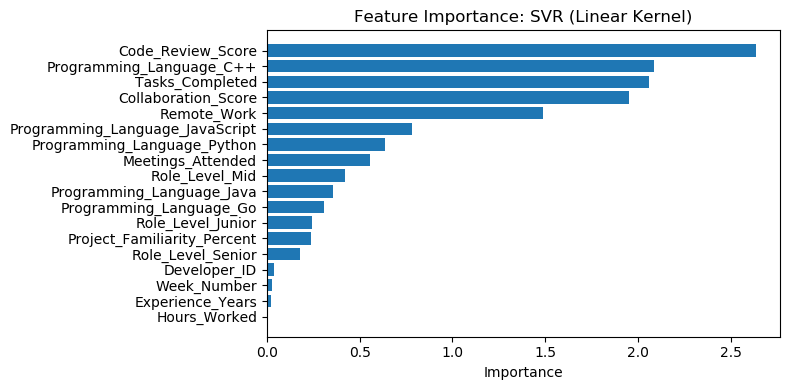


📊 Feature Importance for Random Forest
                            Feature  Importance
5                   Tasks_Completed    0.576406
7       Project_Familiarity_Percent    0.108771
6                 Code_Review_Score    0.092597
8               Collaboration_Score    0.076359
4                      Hours_Worked    0.027959
1                       Week_Number    0.024099
2                  Experience_Years    0.023162
9                 Meetings_Attended    0.022574
0                      Developer_ID    0.017677
10                Role_Level_Junior    0.007239
14          Programming_Language_Go    0.004985
17      Programming_Language_Python    0.003774
16  Programming_Language_JavaScript    0.003497
12                Role_Level_Senior    0.002554
11                   Role_Level_Mid    0.002461
3                       Remote_Work    0.002320
15        Programming_Language_Java    0.001818
13         Programming_Language_C++    0.001748


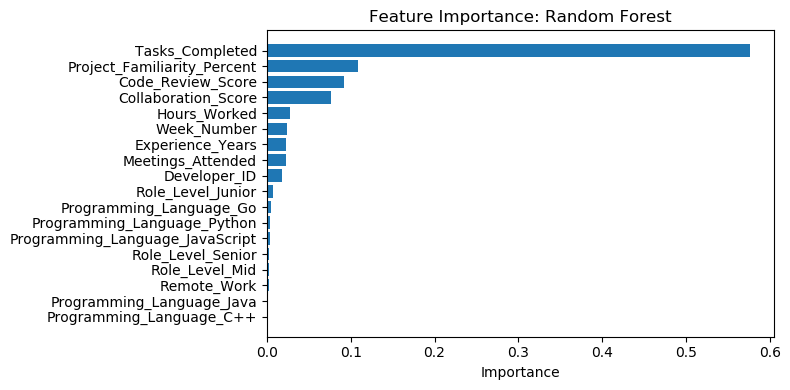


📊 Feature Importance for Gradient Boosting
                            Feature  Importance
5                   Tasks_Completed    0.576015
6                 Code_Review_Score    0.132929
7       Project_Familiarity_Percent    0.123715
8               Collaboration_Score    0.083918
9                 Meetings_Attended    0.025353
4                      Hours_Worked    0.016431
1                       Week_Number    0.013560
2                  Experience_Years    0.012248
0                      Developer_ID    0.008616
14          Programming_Language_Go    0.002154
10                Role_Level_Junior    0.001453
13         Programming_Language_C++    0.001026
15        Programming_Language_Java    0.000987
3                       Remote_Work    0.000683
17      Programming_Language_Python    0.000535
11                   Role_Level_Mid    0.000305
12                Role_Level_Senior    0.000040
16  Programming_Language_JavaScript    0.000031


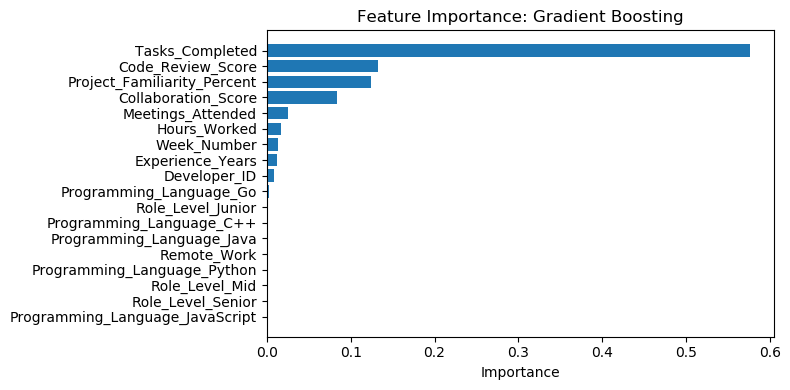


📊 Feature Importance for XGBoost
                            Feature  Importance
5                   Tasks_Completed    0.609558
6                 Code_Review_Score    0.096313
7       Project_Familiarity_Percent    0.079360
8               Collaboration_Score    0.063139
9                 Meetings_Attended    0.026412
14          Programming_Language_Go    0.024294
4                      Hours_Worked    0.017926
16  Programming_Language_JavaScript    0.014075
3                       Remote_Work    0.012855
1                       Week_Number    0.012629
15        Programming_Language_Java    0.011325
2                  Experience_Years    0.010377
12                Role_Level_Senior    0.009785
0                      Developer_ID    0.005066
13         Programming_Language_C++    0.002183
10                Role_Level_Junior    0.002034
11                   Role_Level_Mid    0.001533
17      Programming_Language_Python    0.001136


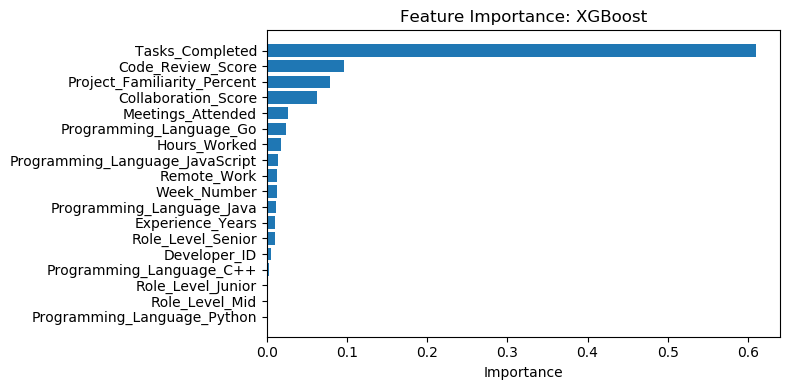

In [7]:
#indep_X = df2.drop('Productivity_Score', axis=1)
#dep_Y = df2['Productivity_Score']

# Run the function
importance_results = feature_importance_all_models(indep_X, dep_Y)

#### Select K algorithm & Recursive Feature Elimination

In [27]:
def apply_selectkbest(X, y, k=4):
    selector = SelectKBest(score_func=f_regression, k=k)
    X_new = selector.fit_transform(X, y)
    selected_feature_names = X.columns[selector.get_support()]
    return X_new, selector, selected_feature_names

def apply_rfe(X, y, k=4):
    estimator = RandomForestRegressor()
    selector = RFE(estimator, n_features_to_select=k)
    X_new = selector.fit_transform(X, y)
    selected_feature_names = X.columns[selector.get_support()]
    return X_new, selector,selected_feature_names

In [43]:
models = {
    'Linear': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'RandomForest': RandomForestRegressor(),
    'SVR': SVR(),
    'XGBoost': XGBRegressor()
}
def evaluate_models(X_sel, y, method_name):
    X_train, X_test, y_train, y_test = train_test_split(X_sel, y, test_size=0.2, random_state=42)

    #scaler = StandardScaler()
    #X_train = scaler.fit_transform(X_train)
    #X_test = scaler.transform(X_test)

    results = []

    for name, model in models.items():
        model.fit(X_train, y_train)  
        preds = model.predict(X_test)
        r2 = r2_score(y_test, preds)
        mse = mean_squared_error(y_test, preds)

        results.append({
            'Model': name,
            'Method': method_name,
            'R2_Score': r2,
            'MSE': mse,
            'Trained_Model': model
        })

    return results

In [44]:
# Apply both feature selection methods

X_kbest, kbest_selector, kbest_features = apply_selectkbest(indep_X, dep_Y, k=4)
X_rfe, rfe_selector, rfe_features = apply_rfe(indep_X, dep_Y, k=4)

# Evaluate models
results_kbest = evaluate_models(X_kbest, dep_Y, method_name='SelectKBest')
results_rfe = evaluate_models(X_rfe, dep_Y, method_name='RFE')

# Combine all results
import pandas as pd
combined_results = pd.DataFrame(results_kbest + results_rfe)


In [45]:
print(dep_Y.describe())

count    200.000000
mean      70.665118
std       12.121972
min       47.184337
25%       61.091459
50%       71.465220
75%       79.222090
max      100.000000
Name: Productivity_Score, dtype: float64


In [46]:
combined_results
#k=8

,Model,Method,R2_Score,MSE,Trained_Model
0,Linear,SelectKBest,0.846837,26.005575,LinearRegression()
1,Ridge,SelectKBest,0.846625,26.041557,Ridge()
2,Lasso,SelectKBest,0.829511,28.947361,Lasso()
3,RandomForest,SelectKBest,0.667942,56.380152,"(DecisionTreeRegressor(max_features='auto', ra..."
4,SVR,SelectKBest,0.140325,145.964353,SVR()
5,XGBoost,SelectKBest,0.713691,48.612455,"XGBRegressor(base_score=0.5, booster='gbtree',..."
6,Linear,RFE,0.846837,26.005575,LinearRegression()
7,Ridge,RFE,0.846625,26.041557,Ridge()
8,Lasso,RFE,0.829511,28.947361,Lasso()
9,RandomForest,RFE,0.688498,52.889993,"(DecisionTreeRegressor(max_features='auto', ra..."


In [47]:
combined_results
#k=6

,Model,Method,R2_Score,MSE,Trained_Model
0,Linear,SelectKBest,0.846837,26.005575,LinearRegression()
1,Ridge,SelectKBest,0.846625,26.041557,Ridge()
2,Lasso,SelectKBest,0.829511,28.947361,Lasso()
3,RandomForest,SelectKBest,0.667942,56.380152,"(DecisionTreeRegressor(max_features='auto', ra..."
4,SVR,SelectKBest,0.140325,145.964353,SVR()
5,XGBoost,SelectKBest,0.713691,48.612455,"XGBRegressor(base_score=0.5, booster='gbtree',..."
6,Linear,RFE,0.846837,26.005575,LinearRegression()
7,Ridge,RFE,0.846625,26.041557,Ridge()
8,Lasso,RFE,0.829511,28.947361,Lasso()
9,RandomForest,RFE,0.688498,52.889993,"(DecisionTreeRegressor(max_features='auto', ra..."


In [48]:
combined_results
#k=4

,Model,Method,R2_Score,MSE,Trained_Model
0,Linear,SelectKBest,0.846837,26.005575,LinearRegression()
1,Ridge,SelectKBest,0.846625,26.041557,Ridge()
2,Lasso,SelectKBest,0.829511,28.947361,Lasso()
3,RandomForest,SelectKBest,0.667942,56.380152,"(DecisionTreeRegressor(max_features='auto', ra..."
4,SVR,SelectKBest,0.140325,145.964353,SVR()
5,XGBoost,SelectKBest,0.713691,48.612455,"XGBRegressor(base_score=0.5, booster='gbtree',..."
6,Linear,RFE,0.846837,26.005575,LinearRegression()
7,Ridge,RFE,0.846625,26.041557,Ridge()
8,Lasso,RFE,0.829511,28.947361,Lasso()
9,RandomForest,RFE,0.688498,52.889993,"(DecisionTreeRegressor(max_features='auto', ra..."


In [49]:
print(combined_results[['Model', 'Method', 'R2_Score', 'MSE']].sort_values(by='R2_Score', ascending=False))


           Model       Method  R2_Score         MSE
0         Linear  SelectKBest  0.846837   26.005575
6         Linear          RFE  0.846837   26.005575
1          Ridge  SelectKBest  0.846625   26.041557
7          Ridge          RFE  0.846625   26.041557
2          Lasso  SelectKBest  0.829511   28.947361
8          Lasso          RFE  0.829511   28.947361
5        XGBoost  SelectKBest  0.713691   48.612455
11       XGBoost          RFE  0.713691   48.612455
9   RandomForest          RFE  0.688498   52.889993
3   RandomForest  SelectKBest  0.667942   56.380152
4            SVR  SelectKBest  0.140325  145.964353
10           SVR          RFE  0.140325  145.964353


In [50]:
# Find best by highest R2 score
#best_row = combined_results.loc[combined_results['R2_Score'].idxmax()]
#best_model = best_row['Trained_Model']
#best_model_name = f"{best_row['Method']}_{best_row['Model']}"


In [51]:
import pickle
best_model = combined_results.loc[0, 'Trained_Model']  # index 0 is best (Linear + SelectKBest)
pickle.dump(best_model, open("finalized_model.sav", "wb"))

# Save selected feature names
pickle.dump(kbest_features.tolist(), open("selected_features.sav", "wb"))


In [52]:
#load the saved model
loaded_model=pickle.load(open("finalized_model.sav",'rb'))
selected_features = pickle.load(open("selected_features.sav", "rb"))
#pickle.dump(scaler, open("scaler.sav", "wb"))

#Get inputs and predict the result

#result=loaded_model.predict([[15,32,5.2,1,46.9,19,6.6,58,4.6,4,0,1,0,0,0,0,0,1]])

original_features = indep_X.columns.tolist()

input_values = [[15,32,5.2,1,46.9,19,6.6,58,4.6,4,0,1,0,0,0,0,0,1]]  # replace with your actual input

# Create DataFrame (same column names as indep_X)
new_data = pd.DataFrame(input_values, columns=original_features)

X_new = new_data[selected_features]

# Predict
result = loaded_model.predict(X_new)


C:\Anaconda\envs\mlai\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [53]:
print(indep_X[['Tasks_Completed', 'Code_Review_Score', 'Project_Familiarity_Percent', 'Collaboration_Score']].describe())

       Tasks_Completed  Code_Review_Score  Project_Familiarity_Percent  \
count       200.000000         200.000000                   200.000000   
mean         11.340000           7.492000                    68.430000   
std           4.874753           1.341767                    17.179955   
min           3.000000           5.000000                    40.000000   
25%           8.000000           6.475000                    52.000000   
50%          11.500000           7.600000                    69.000000   
75%          15.000000           8.400000                    83.000000   
max          19.000000          10.000000                    99.000000   

       Collaboration_Score  
count           200.000000  
mean              6.930000  
std               1.779588  
min               4.100000  
25%               5.300000  
50%               6.900000  
75%               8.525000  
max              10.000000  


In [54]:
new_data

,Developer_ID,Week_Number,Experience_Years,Remote_Work,Hours_Worked,Tasks_Completed,Code_Review_Score,Project_Familiarity_Percent,Collaboration_Score,Meetings_Attended,Role_Level_Junior,Role_Level_Mid,Role_Level_Senior,Programming_Language_C++,Programming_Language_Go,Programming_Language_Java,Programming_Language_JavaScript,Programming_Language_Python
0,15,32,5.2,1,46.9,19,6.6,58,4.6,4,0,1,0,0,0,0,0,1


In [55]:
selected_features

['Tasks_Completed',
 'Code_Review_Score',
 'Project_Familiarity_Percent',
 'Collaboration_Score']

In [56]:
X_new

,Tasks_Completed,Code_Review_Score,Project_Familiarity_Percent,Collaboration_Score
0,19,6.6,58,4.6


In [57]:
result

array([77.43147501])